In [2]:
#Dataset: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-small

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\ASHMITA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df= pd.read_csv("styles.csv")
custom_palette = "viridis"
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,colorgroup,imagePath,image_exists
0,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,Sports,Nike Sahara Team India Fanwear Round Neck Jersey,Blue,./images/1163.jpg,True
1,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,Sports,Nike Men Blue T20 Indian Cricket Jersey,Blue,./images/1164.jpg,True
2,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,Sports,Nike Mean Team India Cricket Jersey,Blue,./images/1165.jpg,True
3,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,Casual,Puma Deck Navy Blue Backpack,Blue,./images/1525.jpg,True
4,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,Sports,Puma Big Cat Backpack Black,Black,./images/1526.jpg,True


In [5]:
df.columns

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'usage', 'productDisplayName', 'colorgroup',
       'imagePath', 'image_exists'],
      dtype='object')

In [6]:
data = pd.read_csv('styles.csv')
print("Original Data:")
print(data.head())

Original Data:
     id  gender masterCategory subCategory articleType baseColour  season  \
0  1163     Men        Apparel     Topwear     Tshirts       Blue  Summer   
1  1164     Men        Apparel     Topwear     Tshirts       Blue  Winter   
2  1165     Men        Apparel     Topwear     Tshirts       Blue  Summer   
3  1525  Unisex    Accessories        Bags   Backpacks  Navy Blue    Fall   
4  1526  Unisex    Accessories        Bags   Backpacks      Black    Fall   

    usage                                productDisplayName colorgroup  \
0  Sports  Nike Sahara Team India Fanwear Round Neck Jersey       Blue   
1  Sports           Nike Men Blue T20 Indian Cricket Jersey       Blue   
2  Sports               Nike Mean Team India Cricket Jersey       Blue   
3  Casual                      Puma Deck Navy Blue Backpack       Blue   
4  Sports                       Puma Big Cat Backpack Black      Black   

           imagePath  image_exists  
0  ./images/1163.jpg          True  
1  

## Data preprocessing

In [7]:
#filtering out unwanted unique values from the masterCategory and subCategory column:
master_categories_to_remove = ['Personal Care', 'Free Items', 'Home']
sub_categories_to_remove = ['Innerwear', 'Fragrance', 'Lips', 'Loungewear and Nightwear', 'Nails', 'Makeup',
                            'Free Gifts', 'Skin Care', 'Bath and Body', 'Water Bottle', 'Perfumes', 'Umbrellas', 
                            'Home Furnishing', 'Vouchers', 'Sports Equipment', 'Shoe Accessories', 'Sports Accessories']

cleaned_df = data[
    (~data['masterCategory'].isin(master_categories_to_remove)) &
    (~data['subCategory'].isin(sub_categories_to_remove))
]
print("Filtered Data (masterCategory):")
print(cleaned_df['masterCategory'].value_counts())
print("\nFiltered Data (subCategory):")
print(cleaned_df['subCategory'].value_counts())

cleaned_df.to_csv('styles.csv', index=False)

#verify
reloaded_df = pd.read_csv('styles.csv')
print("\nReloaded Data (masterCategory):")
print(reloaded_df['masterCategory'].value_counts())
print("\nReloaded Data (subCategory):")
print(reloaded_df['subCategory'].value_counts())

Filtered Data (masterCategory):
Apparel           19117
Accessories       11248
Footwear           9222
Sporting Goods        4
Name: masterCategory, dtype: int64

Filtered Data (subCategory):
Topwear        15401
Shoes           7344
Bags            3055
Bottomwear      2693
Watches         2542
Jewellery       1080
Eyewear         1073
Sandal           963
Wallets          933
Flip Flops       915
Belts            811
Socks            698
Dress            478
Saree            427
Headwear         293
Ties             258
Accessories      143
Scarves          118
Cufflinks        108
Apparel Set      106
Stoles            90
Mufflers          38
Gloves            20
Wristbands         4
Name: subCategory, dtype: int64

Reloaded Data (masterCategory):
Apparel           19117
Accessories       11248
Footwear           9222
Sporting Goods        4
Name: masterCategory, dtype: int64

Reloaded Data (subCategory):
Topwear        15401
Shoes           7344
Bags            3055
Bottomwear    

In [8]:
df.shape

(39591, 12)

In [9]:
df.info

<bound method DataFrame.info of           id  gender masterCategory subCategory articleType baseColour  \
0       1163     Men        Apparel     Topwear     Tshirts       Blue   
1       1164     Men        Apparel     Topwear     Tshirts       Blue   
2       1165     Men        Apparel     Topwear     Tshirts       Blue   
3       1525  Unisex    Accessories        Bags   Backpacks  Navy Blue   
4       1526  Unisex    Accessories        Bags   Backpacks      Black   
...      ...     ...            ...         ...         ...        ...   
39586  59995   Women        Apparel       Dress     Dresses      Black   
39587  59996   Women        Apparel       Dress     Dresses     Purple   
39588  59998   Women       Footwear       Shoes       Heels      Multi   
39589  59999   Women       Footwear       Shoes       Heels     Bronze   
39590  60000   Women        Apparel     Topwear      Kurtas       Blue   

       season   usage                                productDisplayName  \
0   

In [10]:
df.dtypes

id                     int64
gender                object
masterCategory        object
subCategory           object
articleType           object
baseColour            object
season                object
usage                 object
productDisplayName    object
colorgroup            object
imagePath             object
image_exists            bool
dtype: object

Observation: Only id is numerical feature rest categorical data features.

In [11]:
df.isnull().sum()

id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             6
season                21
usage                 26
productDisplayName     2
colorgroup             6
imagePath              0
image_exists           0
dtype: int64

In [12]:
[features for features in df.columns if df[features].isnull().sum()>0]

['baseColour', 'season', 'usage', 'productDisplayName', 'colorgroup']

In [13]:
features_null=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_null:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

baseColour 0.0002  % missing values
season 0.0005  % missing values
usage 0.0007  % missing values
productDisplayName 0.0001  % missing values
colorgroup 0.0002  % missing values


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'id'),
  Text(1.5, 0, 'gender'),
  Text(2.5, 0, 'masterCategory'),
  Text(3.5, 0, 'subCategory'),
  Text(4.5, 0, 'articleType'),
  Text(5.5, 0, 'baseColour'),
  Text(6.5, 0, 'season'),
  Text(7.5, 0, 'usage'),
  Text(8.5, 0, 'productDisplayName'),
  Text(9.5, 0, 'colorgroup'),
  Text(10.5, 0, 'imagePath'),
  Text(11.5, 0, 'image_exists')])

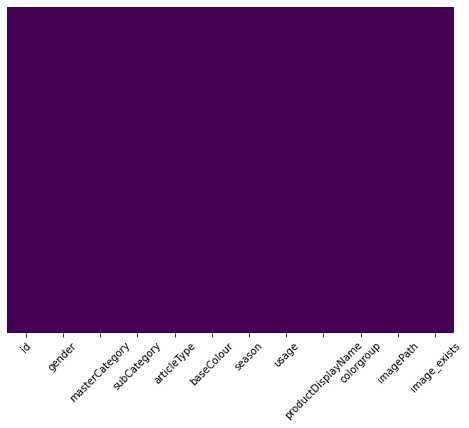

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xticks(rotation=45)

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
usage                 0
productDisplayName    0
colorgroup            0
imagePath             0
image_exists          0
dtype: int64

In [17]:
df.sort_values('id', inplace=True)

In [18]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,colorgroup,imagePath,image_exists
0,1163,Men,Apparel,Topwear,Tshirts,Blue,Summer,Sports,Nike Sahara Team India Fanwear Round Neck Jersey,Blue,./images/1163.jpg,True
1,1164,Men,Apparel,Topwear,Tshirts,Blue,Winter,Sports,Nike Men Blue T20 Indian Cricket Jersey,Blue,./images/1164.jpg,True
2,1165,Men,Apparel,Topwear,Tshirts,Blue,Summer,Sports,Nike Mean Team India Cricket Jersey,Blue,./images/1165.jpg,True
3,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Fall,Casual,Puma Deck Navy Blue Backpack,Blue,./images/1525.jpg,True
4,1526,Unisex,Accessories,Bags,Backpacks,Black,Fall,Sports,Puma Big Cat Backpack Black,Black,./images/1526.jpg,True


In [19]:
df.gender.value_counts()

Men       20385
Women     15605
Unisex     2070
Boys        826
Girls       650
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

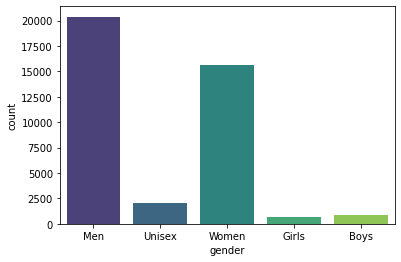

In [20]:
sns.countplot(x="gender", data=df,palette=custom_palette)

Observation: Mostly Men and Women followed by Unisex, Boys and Girls.

In [21]:
df.masterCategory.value_counts()

Apparel           19094
Accessories       11238
Footwear           9200
Sporting Goods        4
Name: masterCategory, dtype: int64

<AxesSubplot:xlabel='masterCategory', ylabel='count'>

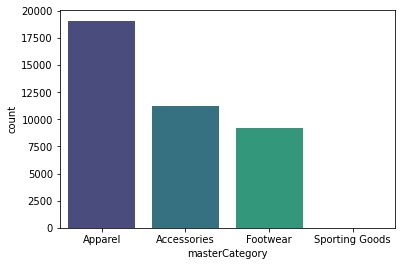

In [22]:
sns.countplot(x="masterCategory", data=df,palette=custom_palette)

Observation: Mostly Apparel followed by Accesories and Footwear.

In [23]:
df.subCategory.value_counts()

Topwear        15386
Shoes           7324
Bags            3053
Bottomwear      2685
Watches         2542
Jewellery       1080
Eyewear         1073
Sandal           961
Wallets          925
Flip Flops       915
Belts            811
Socks            698
Dress            478
Saree            427
Headwear         293
Ties             258
Accessories      143
Scarves          118
Cufflinks        108
Apparel Set      106
Stoles            90
Mufflers          38
Gloves            20
Wristbands         4
Name: subCategory, dtype: int64

<AxesSubplot:xlabel='subCategory', ylabel='count'>

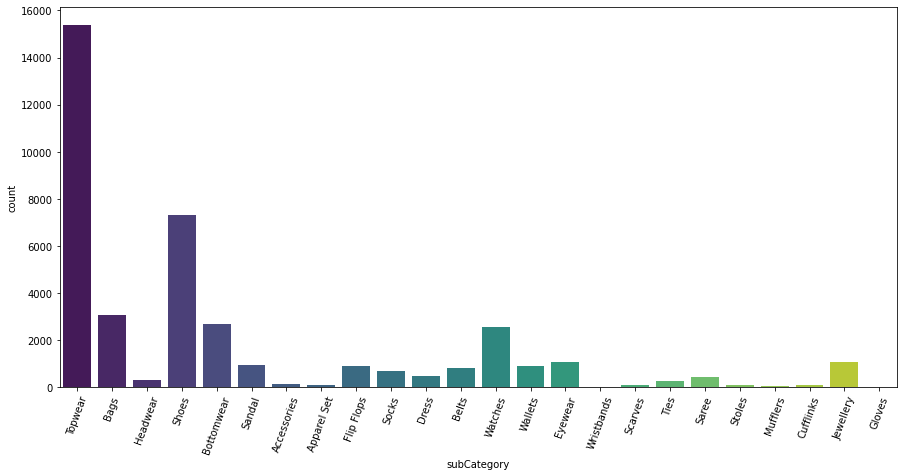

In [24]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=70)
sns.countplot(x="subCategory", data=df,palette=custom_palette)

Observation: Top-3 subCategory are: 
1. Topwear
2. Shoes
3. Bags

In [25]:
df.articleType.value_counts()

Tshirts               7068
Shirts                3212
Casual Shoes          2846
Watches               2542
Sports Shoes          2016
                      ... 
Tablet Sleeve            3
Trolley Bag              3
Ties and Cufflinks       2
Key chain                2
Hair Accessory           1
Name: articleType, Length: 87, dtype: int64

<AxesSubplot:xlabel='articleType', ylabel='count'>

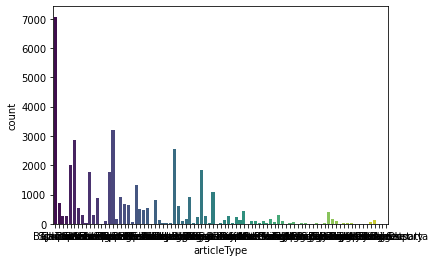

In [26]:
sns.countplot(x="articleType", data=df,palette=custom_palette)

Observation: There are about 92 unique articleType present in our dataset.

In [27]:
#top_10_articletype
aType_10= df['articleType'].value_counts().head(10).index
aType_df_10 = df[df['articleType'].isin(aType_10)]

<AxesSubplot:xlabel='articleType', ylabel='count'>

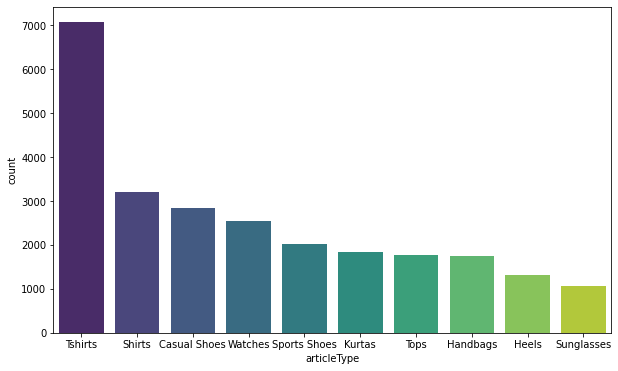

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x="articleType", data=aType_df_10, order=aType_10,palette=custom_palette)

Observation: Top-3 articleType are:
1. Tshirts
2. Shirts
3. Casual Shoes

In [29]:
df.baseColour.unique()

array(['Blue', 'Navy Blue', 'Black', 'Red', 'Grey', 'White', 'Green',
       'Pink', 'Silver', 'Brown', 'Orange', 'Beige', 'Yellow', 'Purple',
       'Maroon', 'Cream', 'Tan', 'Olive', 'Gold', 'Multi', 'Peach',
       'Charcoal', 'Grey Melange', 'Teal', 'Mustard', 'Mauve', 'Magenta',
       'Khaki', 'Burgundy', 'Steel', 'Copper', 'Lavender', 'Coffee Brown',
       'Turquoise Blue', 'Taupe', 'Off White', 'Nude', 'Bronze',
       'Fluorescent Green', 'Rust', 'Sea Green', 'Metallic', 'Skin',
       'Lime Green', 'Mushroom Brown', 'Rose'], dtype=object)

<AxesSubplot:xlabel='baseColour', ylabel='count'>

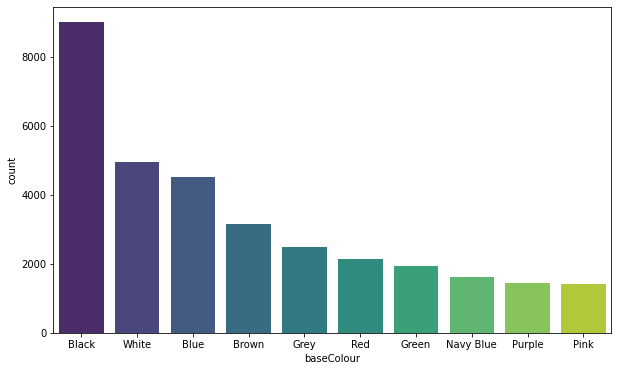

In [30]:
bcol_10= df['baseColour'].value_counts().head(10).index
bcol_df_10 = df[df['baseColour'].isin(bcol_10)]
plt.figure(figsize=(10, 6))
sns.countplot(x="baseColour", data=bcol_df_10, order=bcol_10, palette=custom_palette)

In [31]:
season_counts = df['season'].value_counts()

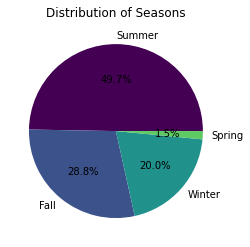

In [32]:
cmap = plt.get_cmap(custom_palette)
num_categories = len(season_counts)
colors = [cmap(i / num_categories) for i in range(num_categories)]
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Seasons')
plt.show()

In [33]:
usage_counts = df['usage'].value_counts()

<AxesSubplot:xlabel='usage', ylabel='count'>

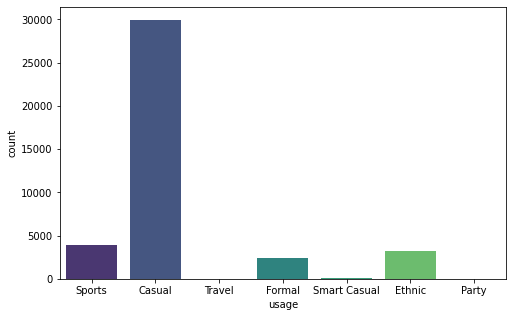

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='usage', data=df, palette='viridis')

In [35]:
df.productDisplayName.value_counts()

Lucera Women Silver Earrings                                  82
Lucera Women Silver Pendant                                   56
Lucera Women Silver Ring                                      50
Catwalk Women Black Heels                                     48
Q&Q Men Black Dial Watch                                      42
                                                              ..
United Colors of Benetton Men Check Grey Shirts                1
United Colors of Benetton Women Stripes Black Sweat Shirts     1
United Colors of Benetton Men Stripes White Tshirts            1
United Colors of Benetton Men Pack of 3 Brown Socks            1
Avirate Black Formal Dress                                     1
Name: productDisplayName, Length: 27034, dtype: int64

In [36]:
pname_10= df['productDisplayName'].value_counts().head(10).index
pname_df_10 = df[df['productDisplayName'].isin(pname_10)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lucera Women Silver Earrings'),
  Text(1, 0, 'Lucera Women Silver Pendant'),
  Text(2, 0, 'Lucera Women Silver Ring'),
  Text(3, 0, 'Catwalk Women Black Heels'),
  Text(4, 0, 'Q&Q Men Black Dial Watch'),
  Text(5, 0, 'Fastrack Men Black Dial Watch'),
  Text(6, 0, 'Fabindia Women Anusuya Silver Earrings'),
  Text(7, 0, 'Maxima Men White Dial Watch'),
  Text(8, 0, 'FNF Multi Coloured Printed Sari'),
  Text(9, 0, 'Miami Blues Women Sunglasses')])

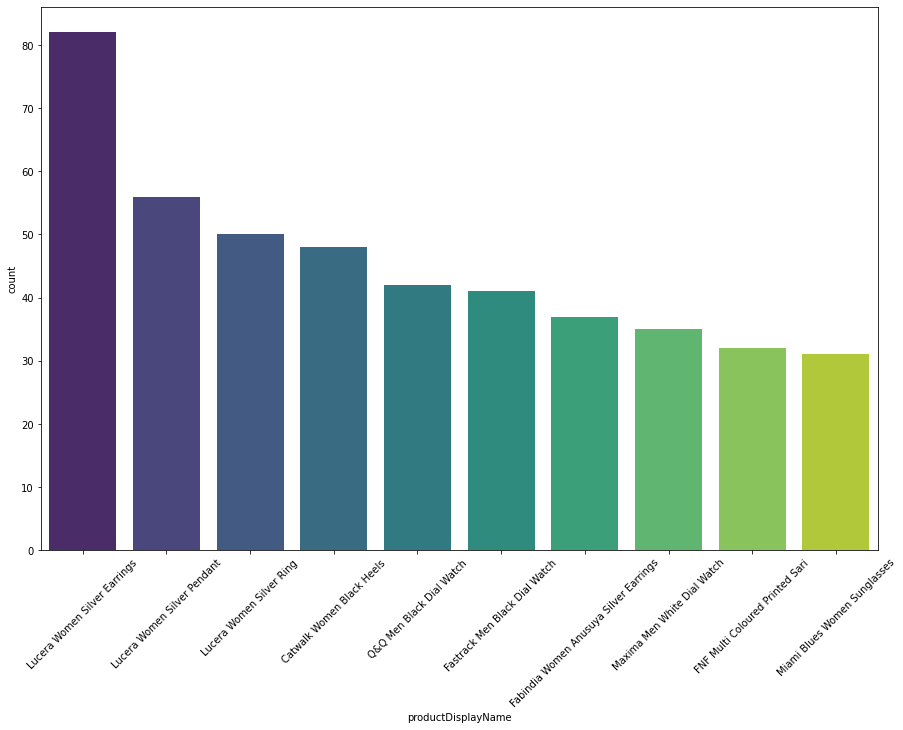

In [37]:
plt.figure(figsize=(15,10))
sns.countplot(x="productDisplayName", data=pname_df_10, order=pname_10,palette='viridis')
plt.xticks(rotation=45)

## Image Processing

In [38]:
import pandas as pd
import os
df = pd.read_csv('styles.csv', delimiter=',', on_bad_lines='skip')
df['imagePath'] = './images/' + df['id'].astype(str) + '.jpg'
def image_exists(image_path):
    return os.path.exists(image_path)
df['image_exists'] = df['imagePath'].apply(image_exists)
missing_images = df[df['image_exists'] == False]
print("Rows with missing images:")
print(missing_images)
print(f"Number of missing images: {missing_images.shape[0]}")

Rows with missing images:
Empty DataFrame
Columns: [id, gender, masterCategory, subCategory, articleType, baseColour, season, usage, productDisplayName, colorgroup, imagePath, image_exists]
Index: []
Number of missing images: 0


In [39]:
df_with_images = df[df['image_exists']]
df_with_images.reset_index(drop=True, inplace=True)
print("Cleaned DataFrame:")
print(df_with_images)
df_with_images.to_csv('styles.csv', index=False)

Cleaned DataFrame:
          id  gender masterCategory subCategory articleType baseColour  \
0       1163     Men        Apparel     Topwear     Tshirts       Blue   
1       1164     Men        Apparel     Topwear     Tshirts       Blue   
2       1165     Men        Apparel     Topwear     Tshirts       Blue   
3       1525  Unisex    Accessories        Bags   Backpacks  Navy Blue   
4       1526  Unisex    Accessories        Bags   Backpacks      Black   
...      ...     ...            ...         ...         ...        ...   
39586  59995   Women        Apparel       Dress     Dresses      Black   
39587  59996   Women        Apparel       Dress     Dresses     Purple   
39588  59998   Women       Footwear       Shoes       Heels      Multi   
39589  59999   Women       Footwear       Shoes       Heels     Bronze   
39590  60000   Women        Apparel     Topwear      Kurtas       Blue   

       season   usage                                productDisplayName  \
0      Summer  Sp

## EDA

In [40]:
#for apparels:
#apparel with season, gender count.
apparel_df = df[df['masterCategory'] == 'Apparel']
df.groupby(['season', "gender"]).size().reset_index(name='Count')

,season,gender,Count
0,Fall,Boys,113
1,Fall,Girls,81
2,Fall,Men,7073
3,Fall,Unisex,476
4,Fall,Women,3632
5,Spring,Boys,6
6,Spring,Girls,3
7,Spring,Men,385
8,Spring,Unisex,84
9,Spring,Women,130


<AxesSubplot:xlabel='season', ylabel='Count'>

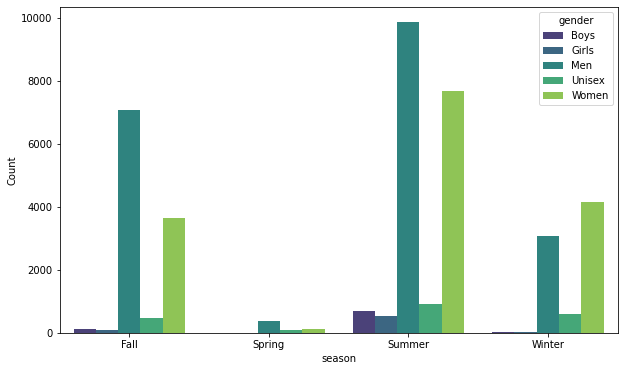

In [41]:
grp_df=df.groupby(['season', "gender"]).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=grp_df, x='season', y='Count', hue='gender', palette="viridis")

Observation: Mostly men apparel in more count for every season.

In [42]:
#articletype with usage & season
df.groupby(['articleType','usage','season']).size().reset_index().rename(columns={0:'Count'})

,articleType,usage,season,Count
0,Accessory Gift Set,Casual,Summer,21
1,Accessory Gift Set,Formal,Fall,49
2,Accessory Gift Set,Formal,Winter,41
3,Backpacks,Casual,Fall,118
4,Backpacks,Casual,Spring,41
...,...,...,...,...
429,Water Bottle,Casual,Fall,2
430,Water Bottle,Casual,Summer,1
431,Water Bottle,Sports,Fall,1
432,Wristbands,Casual,Fall,1


In [43]:
g_df = df.groupby(['articleType', 'usage', 'season']).size().reset_index(name='Count')
articletype_counts = df['articleType'].value_counts()
top_articletypes = articletype_counts.head(5).index
articletype_counts.head(5)


Tshirts         7069
Shirts          3215
Casual Shoes    2846
Watches         2542
Sports Shoes    2036
Name: articleType, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='usage'>

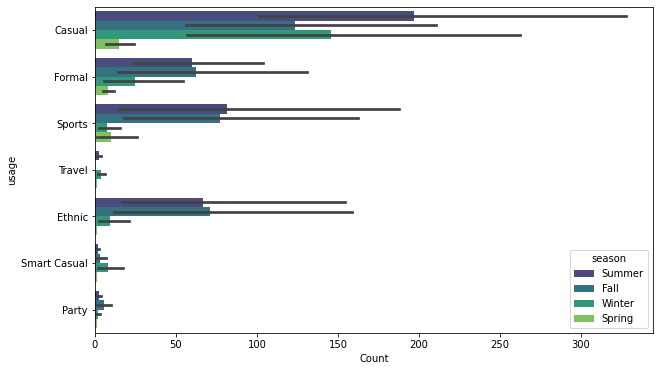

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(data=g_df, x='Count', y='usage', hue='season', palette='viridis')

Observation: Tshirts lead the articleType.


Pivot Table:
colorgroup   Black    Blue  Green   Pink    Red   White
gender                                                 
Boys           0.0   188.0    0.0    0.0  104.0   156.0
Girls          0.0   119.0    0.0  147.0    0.0   105.0
Men         1734.0  2783.0    0.0    0.0    0.0  1481.0
Unisex        15.0    26.0   14.0    0.0    0.0     0.0
Women       1037.0  1344.0    0.0    0.0    0.0  1056.0


<Figure size 720x432 with 0 Axes>

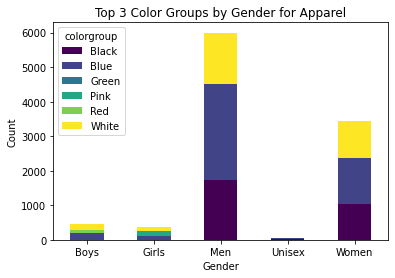

In [45]:
grp_df = apparel_df.groupby(['colorgroup', 'gender']).size().reset_index(name='Count')
grp_df['Rank'] = grp_df.groupby('gender')['Count'].rank(ascending=False, method='dense')

# Filter for the top 3
top_3 = grp_df[grp_df['Rank'] <= 3]
pivot_table = top_3.pivot(index='gender', columns='colorgroup', values='Count').fillna(0)
print("\nPivot Table:")
print(pivot_table)

# Plotting
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 3 Color Groups by Gender for Apparel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='colorgroup')
plt.show()

Observation: Top-3 colour of Colorgroup are:
1. Blue
2. Black
3. White


Pivot Table:
baseColour   Black    Blue  Green   Pink   Red   White
gender                                                
Boys           0.0   139.0    0.0    0.0  96.0   153.0
Girls          0.0    91.0    0.0  135.0   0.0    99.0
Men         1641.0  1953.0    0.0    0.0   0.0  1358.0
Unisex        15.0    24.0   13.0    0.0   0.0     0.0
Women       1014.0  1055.0    0.0    0.0   0.0   815.0


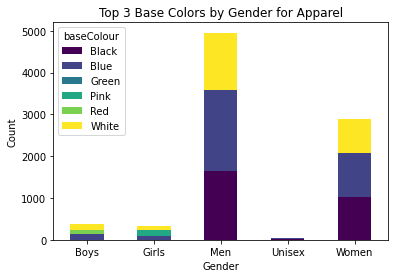

In [46]:
#apparel with baseColour and gender
apparel_df = df[df['masterCategory'] == 'Apparel']
grp_df = apparel_df.groupby(['baseColour', 'gender']).size().reset_index(name='Count')
grp_df['Rank'] = grp_df.groupby('gender')['Count'].rank(ascending=False, method='dense')

# Filter for the top 3
top_3 = grp_df[grp_df['Rank'] <= 3]
pivot_table = top_3.pivot(index='gender', columns='baseColour', values='Count').fillna(0)
print("\nPivot Table:")
print(pivot_table)

# Plotting
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 3 Base Colors by Gender for Apparel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='baseColour')
plt.show()

Observation: Top-3 colour of BaseColor are:

1. Blue
2. Black
3. White

In [47]:
#accessories, usage-casual in respect to gender.
accessories_df = df[df['masterCategory'] == 'Accessories']
casual_accessories_df = accessories_df[accessories_df['usage'] == 'Casual']
casual_accessories_df.groupby(['gender']).size().reset_index(name='Count')

,gender,Count
0,Boys,16
1,Girls,25
2,Men,3729
3,Unisex,1249
4,Women,5063


In [48]:
casual_accessories_df.shape[0]

10082

<AxesSubplot:xlabel='gender', ylabel='Count'>

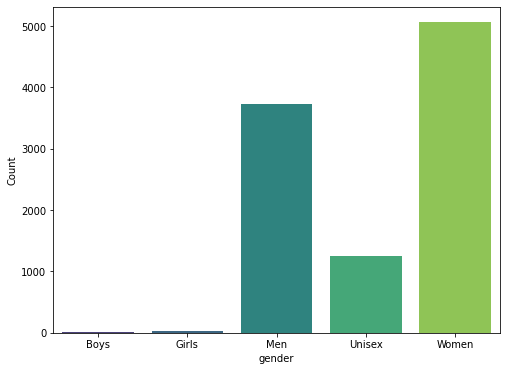

In [49]:
grp_df=casual_accessories_df.groupby(['gender']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(data=grp_df, x='gender', y='Count', palette="viridis")

Observation: Mostly casual accessories in women followed by men.

<AxesSubplot:xlabel='season', ylabel='Count'>

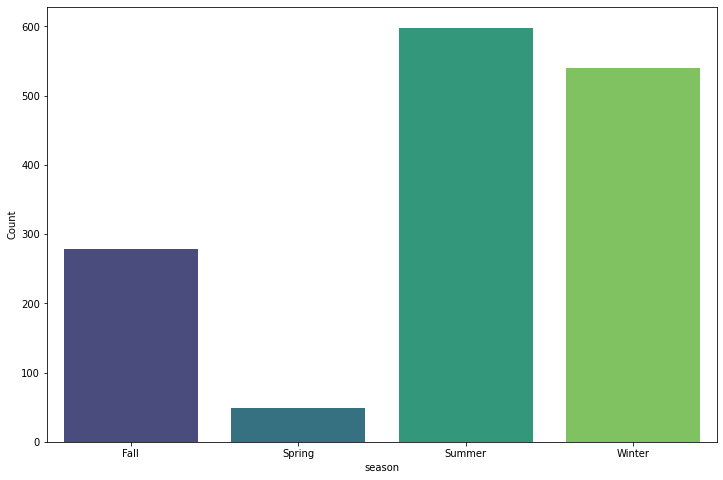

In [50]:
#unisex-accessories,gender,season
unisex_accessories_df = accessories_df[accessories_df['gender'] == 'Unisex']
grp_df=unisex_accessories_df.groupby(['season']).size().reset_index(name='Count')
plt.figure(figsize=(12, 8))
sns.barplot(data=grp_df, x='season', y='Count', palette="viridis")

Observation: Mostly unisex-accessories in summer followed by winter.

In [51]:
#accessories, usage-formal in respect to gender.
accessories_df = df[df['masterCategory'] == 'Accessories']
formal_accessories_df = accessories_df[accessories_df['usage'] == 'Formal']
formal_accessories_df.groupby(['gender']).size().reset_index(name='Count')

,gender,Count
0,Men,521
1,Unisex,1
2,Women,5


In [52]:
formal_accessories_df.shape[0]

527

<AxesSubplot:xlabel='gender', ylabel='Count'>

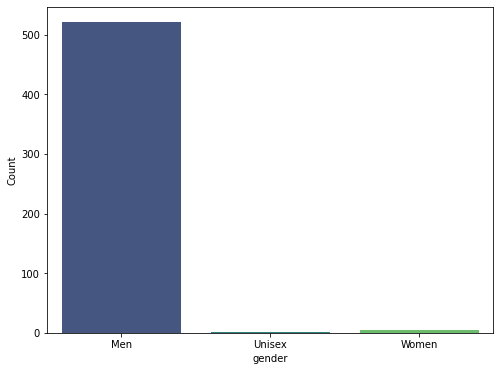

In [53]:
grp_df=formal_accessories_df.groupby(['gender']).size().reset_index(name='Count')
plt.figure(figsize=(8, 6))
sns.barplot(data=grp_df, x='gender', y='Count', palette="viridis")

Observation: Mostly formal-accessories worn by men.

In [54]:
#unisex-accessories with subcategory
unisex_accessories_df.groupby(['subCategory']).size().reset_index(name='Count')

,subCategory,Count
0,Accessories,22
1,Bags,891
2,Belts,9
3,Eyewear,150
4,Gloves,1
5,Headwear,152
6,Mufflers,1
7,Scarves,5
8,Socks,71
9,Wallets,21


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Bags'),
  Text(2, 0, 'Belts'),
  Text(3, 0, 'Eyewear'),
  Text(4, 0, 'Gloves'),
  Text(5, 0, 'Headwear'),
  Text(6, 0, 'Mufflers'),
  Text(7, 0, 'Scarves'),
  Text(8, 0, 'Socks'),
  Text(9, 0, 'Wallets'),
  Text(10, 0, 'Watches')])

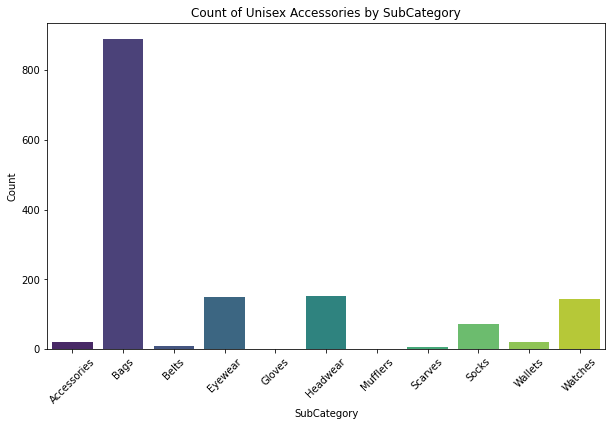

In [55]:
df_group=unisex_accessories_df.groupby(['subCategory']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=df_group, x='subCategory', y='Count', palette="viridis")
plt.xlabel('SubCategory')
plt.ylabel('Count')
plt.title('Count of Unisex Accessories by SubCategory')
plt.xticks(rotation=45)

Observation: Most unisex-accessories by subCategory are:
1. Bags
2. Eyewear
3. Headwear

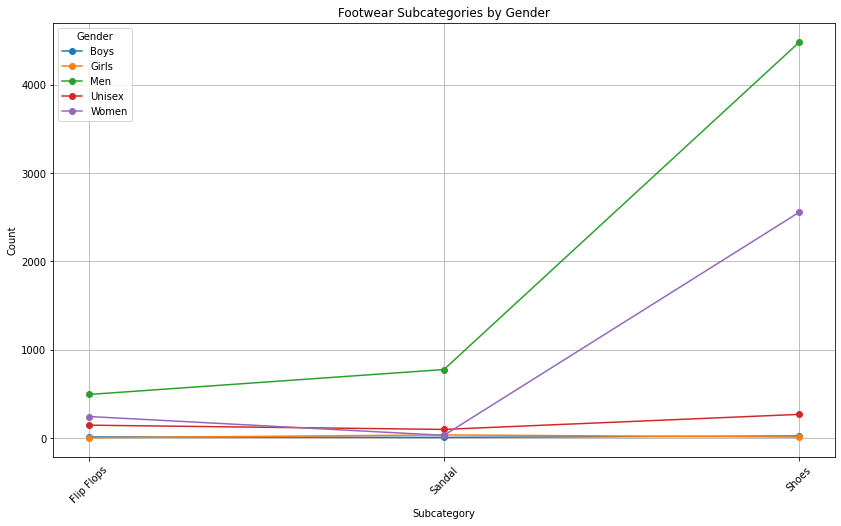

In [56]:
#footwear with subcategory and gender
footwear_df = df[df['masterCategory'] == 'Footwear']
grp_df = footwear_df.groupby(['subCategory', 'gender']).size().reset_index(name='Count')
pivot_table = grp_df.pivot(index='subCategory', columns='gender', values='Count').fillna(0)

plt.figure(figsize=(14, 8))
for gender in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[gender], marker='o', label=gender)
plt.title('Footwear Subcategories by Gender')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Observation:Shoes are most worn footwear in almost every gender.

In [57]:
#articleType with usage-formal and gender
formal_df = df[df['usage'] == 'Formal']
formal_df.groupby(['articleType', 'gender']).size().reset_index(name='Count')

,articleType,gender,Count
0,Accessory Gift Set,Men,90
1,Belts,Men,137
2,Blazers,Men,5
3,Blazers,Women,2
4,Casual Shoes,Men,13
5,Casual Shoes,Women,1
6,Cufflinks,Men,43
7,Dresses,Women,2
8,Flats,Women,1
9,Formal Shoes,Men,607


In [58]:
grouped = formal_df.groupby(['articleType', 'gender']).size().unstack(fill_value=0)
top_10_article_types = grouped.sum(axis=1).sort_values(ascending=False).head(10).index
top_10_grouped = grouped.loc[top_10_article_types]

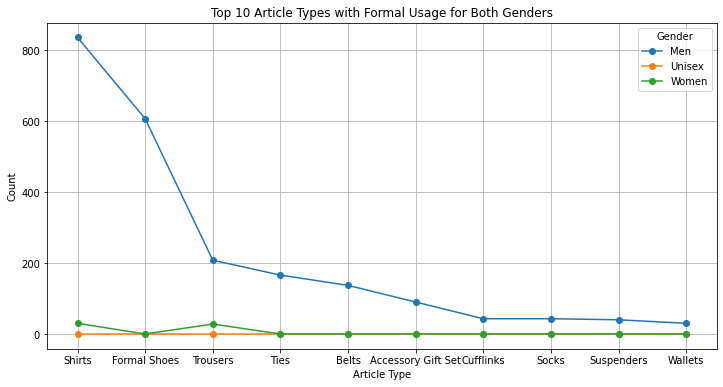

In [59]:
plt.figure(figsize=(12, 6))
for gender in top_10_grouped.columns:
    plt.plot(top_10_grouped.index, top_10_grouped[gender], marker='o', label=gender)
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.title('Top 10 Article Types with Formal Usage for Both Genders')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Observation:Shirts are most worn in every gender followed by trousers.

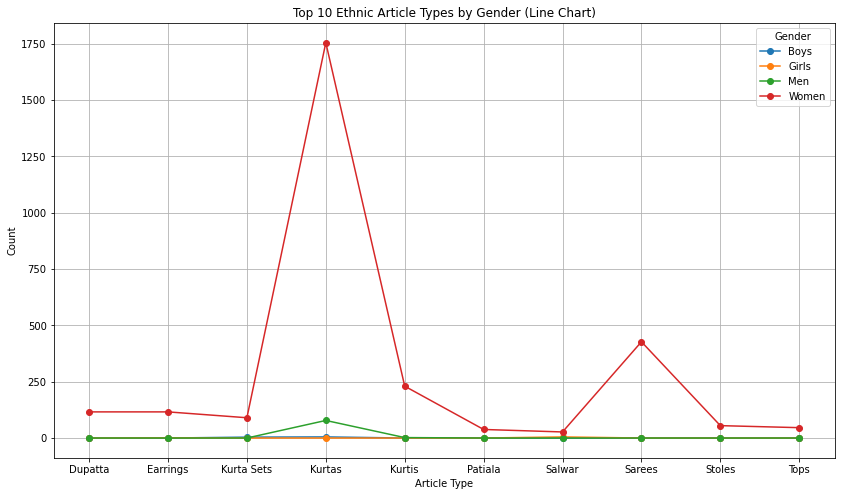

In [60]:
#ethinic-usage with top10 articleType and gender
ethnic_df = df[df['usage'] == 'Ethnic']
grp_df = ethnic_df.groupby(['articleType', 'gender']).size().reset_index(name='Count')

#top 10 article types 
top_10_article_types = grp_df.groupby('articleType')['Count'].sum().nlargest(10).index
top_10_grp_df = grp_df[grp_df['articleType'].isin(top_10_article_types)]
pivot_table = top_10_grp_df.pivot(index='articleType', columns='gender', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
for gender in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[gender], marker='o', label=gender)
plt.title('Top 10 Ethnic Article Types by Gender (Line Chart)')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

Observation: Kurtas are most worn in almost every gender.

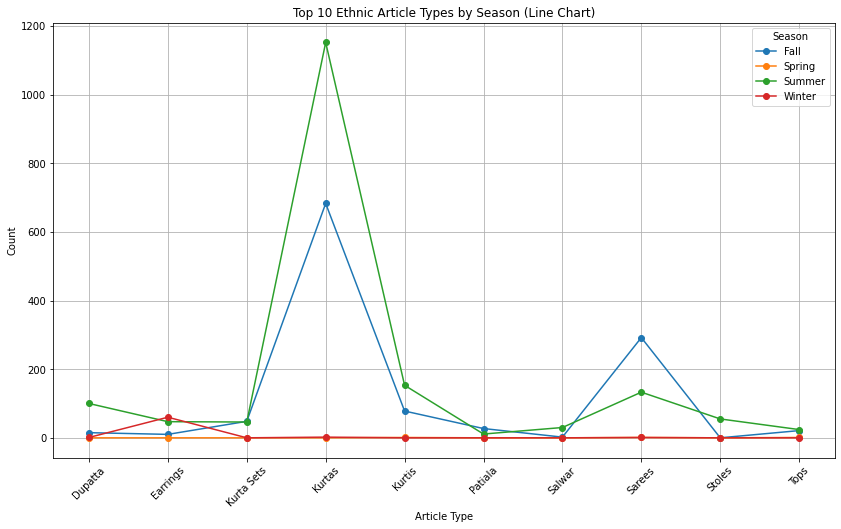

In [61]:
grp_df = ethnic_df.groupby(['articleType', 'season']).size().reset_index(name='Count')

# Identify the top 10 article types by total count
top_10_article_types = grp_df.groupby('articleType')['Count'].sum().nlargest(10).index

# Filter the grouped data to include only the top 10 article types
top_10_grp_df = grp_df[grp_df['articleType'].isin(top_10_article_types)]

# Create a pivot table with 'articleType' as index, 'season' as columns, and 'Count' as values
pivot_table = top_10_grp_df.pivot(index='articleType', columns='season', values='Count').fillna(0)

# Plot the pivot table as a line chart
plt.figure(figsize=(14, 8))
for season in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[season], marker='o', label=season)

# Add labels and title
plt.title('Top 10 Ethnic Article Types by Season (Line Chart)')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.show()

Observation:Kurtas are most worn in almost every season.

## Feature Engineering

In [62]:
# Color grouping
df = pd.read_csv('styles.csv')

# Color grouping mapping dictionary
color_mapping = {
    'Navy Blue': 'Blue', 
    'Blue': 'Blue', 
    'Teal': 'Blue', 
    'Turquoise Blue': 'Blue',

    'Silver': 'Grey', 
    'Grey': 'Grey', 
    'Grey Melange': 'Grey', 
    'Steel': 'Grey',

    'Black': 'Black', 
    'Charcoal': 'Black',

    'Green': 'Green', 
    'Olive': 'Green', 
    'Lime Green': 'Green', 
    'Fluorescent Green': 'Green', 
    'Sea Green': 'Green',

    'Purple': 'Purple', 
    'Magenta': 'Purple', 
    'Lavender': 'Purple', 
    'Mauve': 'Purple',

    'White': 'White', 
    'Off White': 'White', 
    'Cream': 'White', 
    'Skin': 'White',

    'Beige': 'Brown', 
    'Brown': 'Brown', 
    'Coffee Brown': 'Brown', 
    'Tan': 'Brown', 
    'Khaki': 'Brown', 
    'Mushroom Brown': 'Brown', 
    'Nude': 'Brown',

    'Gold': 'Metallic', 
    'Bronze': 'Metallic', 
    'Copper': 'Metallic', 
    'Metallic': 'Metallic',

    'Red': 'Red', 
    'Burgundy': 'Red', 
    'Rose': 'Red',

    'Pink': 'Pink', 
    'Peach': 'Pink',

    'Yellow': 'Yellow', 
    'Mustard': 'Yellow', 
    'Taupe': 'Yellow',

    'Orange': 'Orange',

    'Maroon': 'Red', 
    'Rust': 'Brown', 
    'Multi': 'Multi', 
}

df['colorgroup'] = df['baseColour'].map(color_mapping)

#verify
print(df.head())
df.to_csv('styles.csv', index=False)

     id  gender masterCategory subCategory articleType baseColour  season  \
0  1163     Men        Apparel     Topwear     Tshirts       Blue  Summer   
1  1164     Men        Apparel     Topwear     Tshirts       Blue  Winter   
2  1165     Men        Apparel     Topwear     Tshirts       Blue  Summer   
3  1525  Unisex    Accessories        Bags   Backpacks  Navy Blue    Fall   
4  1526  Unisex    Accessories        Bags   Backpacks      Black    Fall   

    usage                                productDisplayName colorgroup  \
0  Sports  Nike Sahara Team India Fanwear Round Neck Jersey       Blue   
1  Sports           Nike Men Blue T20 Indian Cricket Jersey       Blue   
2  Sports               Nike Mean Team India Cricket Jersey       Blue   
3  Casual                      Puma Deck Navy Blue Backpack       Blue   
4  Sports                       Puma Big Cat Backpack Black      Black   

           imagePath  image_exists  
0  ./images/1163.jpg          True  
1  ./images/1164.j

In [63]:
df = df[['id', 'gender', 'masterCategory','subCategory', 'articleType', 'baseColour', 'colorgroup', 'season', 'usage', 'productDisplayName']]
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,colorgroup,season,usage,productDisplayName
0,1163,Men,Apparel,Topwear,Tshirts,Blue,Blue,Summer,Sports,Nike Sahara Team India Fanwear Round Neck Jersey
1,1164,Men,Apparel,Topwear,Tshirts,Blue,Blue,Winter,Sports,Nike Men Blue T20 Indian Cricket Jersey
2,1165,Men,Apparel,Topwear,Tshirts,Blue,Blue,Summer,Sports,Nike Mean Team India Cricket Jersey
3,1525,Unisex,Accessories,Bags,Backpacks,Navy Blue,Blue,Fall,Casual,Puma Deck Navy Blue Backpack
4,1526,Unisex,Accessories,Bags,Backpacks,Black,Black,Fall,Sports,Puma Big Cat Backpack Black


In [64]:
df.colorgroup.value_counts()

Black       9172
Blue        6311
White       5442
Brown       4215
Grey        3872
Red         2640
Green       2354
Purple      1663
Pink        1535
Yellow       830
Metallic     732
Orange       456
Multi        363
Name: colorgroup, dtype: int64

<AxesSubplot:xlabel='colorgroup', ylabel='count'>

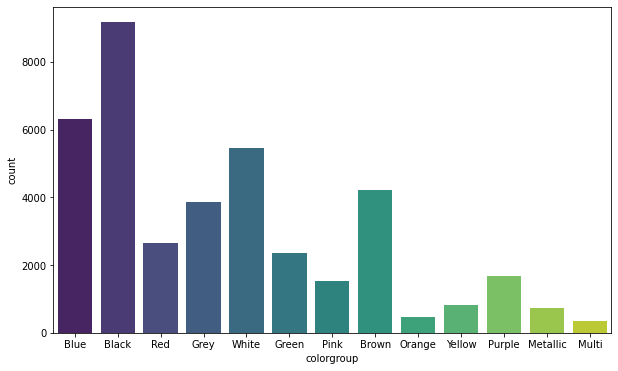

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='colorgroup', data=df, palette='viridis')

In [66]:
print(df['colorgroup'].unique())

['Blue' 'Black' 'Red' 'Grey' 'White' 'Green' 'Pink' 'Brown' 'Orange'
 'Yellow' 'Purple' 'Metallic' 'Multi' nan]


In [67]:
colorgroup_encoded = pd.get_dummies(df['colorgroup'], prefix='colorgroup')
df = pd.concat([df, colorgroup_encoded], axis=1)
print(df.columns)
print(df.head())
print(df.tail())

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'colorgroup', 'season', 'usage', 'productDisplayName',
       'colorgroup_Black', 'colorgroup_Blue', 'colorgroup_Brown',
       'colorgroup_Green', 'colorgroup_Grey', 'colorgroup_Metallic',
       'colorgroup_Multi', 'colorgroup_Orange', 'colorgroup_Pink',
       'colorgroup_Purple', 'colorgroup_Red', 'colorgroup_White',
       'colorgroup_Yellow'],
      dtype='object')
     id  gender masterCategory subCategory articleType baseColour colorgroup  \
0  1163     Men        Apparel     Topwear     Tshirts       Blue       Blue   
1  1164     Men        Apparel     Topwear     Tshirts       Blue       Blue   
2  1165     Men        Apparel     Topwear     Tshirts       Blue       Blue   
3  1525  Unisex    Accessories        Bags   Backpacks  Navy Blue       Blue   
4  1526  Unisex    Accessories        Bags   Backpacks      Black      Black   

   season   usage                                prod

In [68]:
masterCategory_encoded = pd.get_dummies(df['masterCategory'], prefix='masterCategory')
df = pd.concat([df, masterCategory_encoded], axis=1)
print(df.columns)
print(df.head())
print(df.tail())

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'colorgroup', 'season', 'usage', 'productDisplayName',
       'colorgroup_Black', 'colorgroup_Blue', 'colorgroup_Brown',
       'colorgroup_Green', 'colorgroup_Grey', 'colorgroup_Metallic',
       'colorgroup_Multi', 'colorgroup_Orange', 'colorgroup_Pink',
       'colorgroup_Purple', 'colorgroup_Red', 'colorgroup_White',
       'colorgroup_Yellow', 'masterCategory_Accessories',
       'masterCategory_Apparel', 'masterCategory_Footwear',
       'masterCategory_Sporting Goods'],
      dtype='object')
     id  gender masterCategory subCategory articleType baseColour colorgroup  \
0  1163     Men        Apparel     Topwear     Tshirts       Blue       Blue   
1  1164     Men        Apparel     Topwear     Tshirts       Blue       Blue   
2  1165     Men        Apparel     Topwear     Tshirts       Blue       Blue   
3  1525  Unisex    Accessories        Bags   Backpacks  Navy Blue       Blue   
4  1

In [69]:
print(df['usage'].unique())

['Sports' 'Casual' 'Travel' 'Formal' 'Smart Casual' 'Ethnic' nan 'Party']


In [70]:
#replacing smart casual with casual in usage feature:
print("Unique values in 'usage' before replacement:", df['usage'].unique())
df['usage'] = df['usage'].replace('Smart Casual', 'Casual')
print("Unique values in 'usage' after replacement:", df['usage'].unique())

Unique values in 'usage' before replacement: ['Sports' 'Casual' 'Travel' 'Formal' 'Smart Casual' 'Ethnic' nan 'Party']
Unique values in 'usage' after replacement: ['Sports' 'Casual' 'Travel' 'Formal' 'Ethnic' nan 'Party']


In [71]:
#one-hot encoding of season and usage with relation to articletype:
df_encoded = pd.get_dummies(df, columns=['season', 'usage'])
print(df.columns)
print(df.head())
print(df.tail())

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'colorgroup', 'season', 'usage', 'productDisplayName',
       'colorgroup_Black', 'colorgroup_Blue', 'colorgroup_Brown',
       'colorgroup_Green', 'colorgroup_Grey', 'colorgroup_Metallic',
       'colorgroup_Multi', 'colorgroup_Orange', 'colorgroup_Pink',
       'colorgroup_Purple', 'colorgroup_Red', 'colorgroup_White',
       'colorgroup_Yellow', 'masterCategory_Accessories',
       'masterCategory_Apparel', 'masterCategory_Footwear',
       'masterCategory_Sporting Goods'],
      dtype='object')
     id  gender masterCategory subCategory articleType baseColour colorgroup  \
0  1163     Men        Apparel     Topwear     Tshirts       Blue       Blue   
1  1164     Men        Apparel     Topwear     Tshirts       Blue       Blue   
2  1165     Men        Apparel     Topwear     Tshirts       Blue       Blue   
3  1525  Unisex    Accessories        Bags   Backpacks  Navy Blue       Blue   
4  1

In [72]:
article_season_usage = df_encoded.groupby('articleType').sum()
print("Aggregated DataFrame (ArticleType vs. Season and Usage):")
print(article_season_usage.head())
print(article_season_usage.tail())

Aggregated DataFrame (ArticleType vs. Season and Usage):
                          id  colorgroup_Black  colorgroup_Blue  \
articleType                                                       
Accessory Gift Set   2803904              17.0             22.0   
Backpacks           15414437             294.0            152.0   
Bangle               4108426               7.0              3.0   
Belts               25397395             329.0             37.0   
Blazers               245531               4.0              2.0   

                    colorgroup_Brown  colorgroup_Green  colorgroup_Grey  \
articleType                                                               
Accessory Gift Set              19.0               0.0              3.0   
Backpacks                       22.0              51.0             71.0   
Bangle                           2.0               5.0             27.0   
Belts                          287.0              31.0             20.0   
Blazers                

In [73]:
suitable_for_casual = article_season_usage[article_season_usage['usage_Casual'] > 0]
print("Article types suitable for Casual usage:")
print(suitable_for_casual.index.tolist())

Article types suitable for Casual usage:
['Accessory Gift Set', 'Backpacks', 'Bangle', 'Belts', 'Blazers', 'Booties', 'Bracelet', 'Capris', 'Caps', 'Casual Shoes', 'Clothing Set', 'Clutches', 'Cufflinks', 'Dresses', 'Duffel Bag', 'Earrings', 'Flats', 'Flip Flops', 'Formal Shoes', 'Gloves', 'Hair Accessory', 'Handbags', 'Hat', 'Headband', 'Heels', 'Jackets', 'Jeans', 'Jeggings', 'Jewellery Set', 'Jumpsuit', 'Key chain', 'Kurtas', 'Kurtis', 'Laptop Bag', 'Leggings', 'Messenger Bag', 'Mobile Pouch', 'Mufflers', 'Necklace and Chains', 'Pendant', 'Rain Jacket', 'Ring', 'Rompers', 'Rucksacks', 'Sandals', 'Scarves', 'Shirts', 'Shorts', 'Shrug', 'Skirts', 'Socks', 'Sports Sandals', 'Sports Shoes', 'Stockings', 'Stoles', 'Sunglasses', 'Sweaters', 'Sweatshirts', 'Swimwear', 'Tablet Sleeve', 'Ties', 'Ties and Cufflinks', 'Tights', 'Tops', 'Track Pants', 'Tracksuits', 'Travel Accessory', 'Trolley Bag', 'Trousers', 'Tshirts', 'Tunics', 'Waist Pouch', 'Waistcoat', 'Wallets', 'Watches', 'Water Bottle

In [74]:
suitable_for_ethnic = article_season_usage[article_season_usage['usage_Ethnic'] > 0]
print("Article types suitable for Ethnic usage:")
print(suitable_for_ethnic.index.tolist())

Article types suitable for Ethnic usage:
['Bangle', 'Bracelet', 'Capris', 'Churidar', 'Clutches', 'Dupatta', 'Earrings', 'Flats', 'Handbags', 'Heels', 'Jackets', 'Jewellery Set', 'Kurta Sets', 'Kurtas', 'Kurtis', 'Leggings', 'Lehenga Choli', 'Necklace and Chains', 'Nehru Jackets', 'Patiala', 'Pendant', 'Salwar', 'Salwar and Dupatta', 'Sarees', 'Shirts', 'Skirts', 'Stoles', 'Ties', 'Tops', 'Trousers', 'Tunics', 'Waistcoat']


In [75]:
suitable_for_formal = article_season_usage[article_season_usage['usage_Formal'] > 0]
print("Article types suitable for Formal usage:")
print(suitable_for_formal.index.tolist())

Article types suitable for Formal usage:
['Accessory Gift Set', 'Belts', 'Blazers', 'Casual Shoes', 'Cufflinks', 'Dresses', 'Flats', 'Formal Shoes', 'Handbags', 'Heels', 'Laptop Bag', 'Sandals', 'Shirts', 'Skirts', 'Socks', 'Suspenders', 'Ties', 'Tops', 'Trousers', 'Tshirts', 'Wallets', 'Watches']


In [76]:
suitable_for_party = article_season_usage[article_season_usage['usage_Party'] > 0]
print("Article types suitable for Party usage:")
print(suitable_for_party.index.tolist())

Article types suitable for Party usage:
['Clutches', 'Dresses', 'Heels', 'Shirts', 'Tops', 'Watches']


In [77]:
suitable_for_sports = article_season_usage[article_season_usage['usage_Sports'] > 0]
print("Article types suitable for Sports usage:")
print(suitable_for_sports.index.tolist())

Article types suitable for Sports usage:
['Backpacks', 'Capris', 'Caps', 'Casual Shoes', 'Duffel Bag', 'Flats', 'Flip Flops', 'Handbags', 'Headband', 'Jackets', 'Leggings', 'Sandals', 'Shorts', 'Skirts', 'Socks', 'Sports Sandals', 'Sports Shoes', 'Sunglasses', 'Sweaters', 'Sweatshirts', 'Swimwear', 'Tights', 'Tops', 'Track Pants', 'Tracksuits', 'Tshirts', 'Watches', 'Water Bottle', 'Wristbands']


In [78]:
suitable_for_travel = article_season_usage[article_season_usage['usage_Travel'] > 0]
print("Article types suitable for Travel usage:")
print(suitable_for_travel.index.tolist())

Article types suitable for Travel usage:
['Backpacks', 'Duffel Bag', 'Handbags', 'Jackets', 'Mobile Pouch', 'Rucksacks']


In [79]:
suitable_for_summer = article_season_usage[article_season_usage['season_Summer'] > 0]
print("Article types suitable for Summer:")
print(suitable_for_summer.index.tolist())

Article types suitable for Summer:
['Accessory Gift Set', 'Backpacks', 'Bangle', 'Belts', 'Blazers', 'Booties', 'Bracelet', 'Capris', 'Caps', 'Casual Shoes', 'Churidar', 'Clothing Set', 'Clutches', 'Cufflinks', 'Dresses', 'Duffel Bag', 'Dupatta', 'Earrings', 'Flats', 'Flip Flops', 'Formal Shoes', 'Gloves', 'Handbags', 'Headband', 'Heels', 'Jackets', 'Jeans', 'Jeggings', 'Jewellery Set', 'Jumpsuit', 'Key chain', 'Kurta Sets', 'Kurtas', 'Kurtis', 'Laptop Bag', 'Leggings', 'Lehenga Choli', 'Messenger Bag', 'Mobile Pouch', 'Mufflers', 'Necklace and Chains', 'Nehru Jackets', 'Patiala', 'Pendant', 'Rain Jacket', 'Rain Trousers', 'Ring', 'Rompers', 'Rucksacks', 'Salwar', 'Salwar and Dupatta', 'Sandals', 'Sarees', 'Scarves', 'Shirts', 'Shorts', 'Shrug', 'Skirts', 'Socks', 'Sports Sandals', 'Sports Shoes', 'Stockings', 'Stoles', 'Sunglasses', 'Suspenders', 'Sweaters', 'Sweatshirts', 'Swimwear', 'Tablet Sleeve', 'Ties', 'Ties and Cufflinks', 'Tights', 'Tops', 'Track Pants', 'Tracksuits', 'Travel

In [80]:
suitable_for_winter = article_season_usage[article_season_usage['season_Winter'] > 0]
print("Article types suitable for Winter:")
print(suitable_for_winter.index.tolist())

Article types suitable for Winter:
['Accessory Gift Set', 'Backpacks', 'Bangle', 'Belts', 'Bracelet', 'Capris', 'Caps', 'Casual Shoes', 'Clutches', 'Dresses', 'Duffel Bag', 'Dupatta', 'Earrings', 'Flats', 'Flip Flops', 'Formal Shoes', 'Hair Accessory', 'Handbags', 'Heels', 'Jackets', 'Jeans', 'Jewellery Set', 'Jumpsuit', 'Key chain', 'Kurtas', 'Laptop Bag', 'Leggings', 'Messenger Bag', 'Mobile Pouch', 'Necklace and Chains', 'Pendant', 'Ring', 'Rucksacks', 'Sandals', 'Sarees', 'Scarves', 'Shirts', 'Shorts', 'Skirts', 'Socks', 'Sports Sandals', 'Sports Shoes', 'Sunglasses', 'Sweaters', 'Sweatshirts', 'Swimwear', 'Tablet Sleeve', 'Tops', 'Track Pants', 'Travel Accessory', 'Trousers', 'Tshirts', 'Waist Pouch', 'Wallets', 'Watches']


In [81]:
suitable_for_spring = article_season_usage[article_season_usage['season_Spring'] > 0]
print("Article types suitable for Spring:")
print(suitable_for_spring.index.tolist())

Article types suitable for Spring:
['Backpacks', 'Bangle', 'Belts', 'Caps', 'Casual Shoes', 'Clutches', 'Dresses', 'Duffel Bag', 'Flats', 'Flip Flops', 'Formal Shoes', 'Handbags', 'Heels', 'Jeans', 'Kurtis', 'Laptop Bag', 'Leggings', 'Mobile Pouch', 'Sandals', 'Sarees', 'Shirts', 'Shorts', 'Socks', 'Sports Sandals', 'Sports Shoes', 'Stockings', 'Stoles', 'Sweaters', 'Ties and Cufflinks', 'Tops', 'Track Pants', 'Trousers', 'Tshirts', 'Wallets', 'Watches']


In [82]:
suitable_for_fall = article_season_usage[article_season_usage['season_Fall'] > 0]
print("Article types suitable for Fall:")
print(suitable_for_fall.index.tolist())

Article types suitable for Fall:
['Accessory Gift Set', 'Backpacks', 'Bangle', 'Belts', 'Capris', 'Caps', 'Casual Shoes', 'Churidar', 'Clutches', 'Cufflinks', 'Dresses', 'Duffel Bag', 'Dupatta', 'Earrings', 'Flats', 'Flip Flops', 'Formal Shoes', 'Gloves', 'Handbags', 'Hat', 'Headband', 'Heels', 'Jackets', 'Jeans', 'Jeggings', 'Jewellery Set', 'Jumpsuit', 'Kurta Sets', 'Kurtas', 'Kurtis', 'Laptop Bag', 'Leggings', 'Lehenga Choli', 'Messenger Bag', 'Mobile Pouch', 'Mufflers', 'Necklace and Chains', 'Patiala', 'Pendant', 'Rain Jacket', 'Ring', 'Salwar', 'Salwar and Dupatta', 'Sandals', 'Sarees', 'Scarves', 'Shirts', 'Shorts', 'Shrug', 'Skirts', 'Socks', 'Sports Sandals', 'Sports Shoes', 'Stockings', 'Stoles', 'Sunglasses', 'Sweaters', 'Sweatshirts', 'Swimwear', 'Ties', 'Tights', 'Tops', 'Track Pants', 'Tracksuits', 'Travel Accessory', 'Trousers', 'Tshirts', 'Tunics', 'Waistcoat', 'Wallets', 'Watches', 'Water Bottle', 'Wristbands']


In [83]:
#one-hot encoding of gender in relation to articletype
print(df['gender'].unique())

['Men' 'Unisex' 'Women' 'Girls' 'Boys']


In [84]:
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, gender_encoded], axis=1)
print(df.columns)

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'colorgroup', 'season', 'usage', 'productDisplayName',
       'colorgroup_Black', 'colorgroup_Blue', 'colorgroup_Brown',
       'colorgroup_Green', 'colorgroup_Grey', 'colorgroup_Metallic',
       'colorgroup_Multi', 'colorgroup_Orange', 'colorgroup_Pink',
       'colorgroup_Purple', 'colorgroup_Red', 'colorgroup_White',
       'colorgroup_Yellow', 'masterCategory_Accessories',
       'masterCategory_Apparel', 'masterCategory_Footwear',
       'masterCategory_Sporting Goods', 'gender_Boys', 'gender_Girls',
       'gender_Men', 'gender_Unisex', 'gender_Women'],
      dtype='object')


In [85]:
one_hot_gender_columns = [col for col in df.columns if col.startswith('gender_')]
article_gender_agg = df.groupby('articleType')[one_hot_gender_columns].sum()
print(article_gender_agg.head())
print(article_gender_agg.tail())

                    gender_Boys  gender_Girls  gender_Men  gender_Unisex  \
articleType                                                                
Accessory Gift Set          0.0           0.0       111.0            0.0   
Backpacks                   0.0           2.0        55.0          630.0   
Bangle                      0.0           0.0        14.0            0.0   
Belts                       0.0           0.0       541.0            9.0   
Blazers                     1.0           0.0         5.0            0.0   

                    gender_Women  
articleType                       
Accessory Gift Set           0.0  
Backpacks                   35.0  
Bangle                      71.0  
Belts                      263.0  
Blazers                      2.0  
              gender_Boys  gender_Girls  gender_Men  gender_Unisex  \
articleType                                                          
Waistcoat             3.0           0.0         7.0            0.0   
Wallets     

## Splitting The Dataset

In [86]:
from sklearn.model_selection import train_test_split

# Define features and labels
features = df[['colorgroup', 'season', 'usage', 'gender']]
labels = df['articleType']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

## Image Processing

### Image Path Exist 

In [87]:
# Construct the image paths
df['imagePath'] = './images/' + df['id'].astype(str) + '.jpg'

import os
def file_exists(path):
    return os.path.isfile(path)

df['path_exists'] = df['imagePath'].apply(file_exists)

# Display rows where the path does not exist
invalid_paths = df[df['path_exists'] == False][['id', 'imagePath']]
print(invalid_paths.head())
print(f"Total invalid paths: {len(invalid_paths)}")


Empty DataFrame
Columns: [id, imagePath]
Index: []
Total invalid paths: 0


In [88]:
# Print a sample of the DataFrame
print(df[['id', 'imagePath', 'articleType']].head())


     id          imagePath articleType
0  1163  ./images/1163.jpg     Tshirts
1  1164  ./images/1164.jpg     Tshirts
2  1165  ./images/1165.jpg     Tshirts
3  1525  ./images/1525.jpg   Backpacks
4  1526  ./images/1526.jpg   Backpacks


In [89]:
# Ensure articleType is a string
df['articleType'] = df['articleType'].astype(str)

#data types
print(df.dtypes)

id                                int64
gender                           object
masterCategory                   object
subCategory                      object
articleType                      object
baseColour                       object
colorgroup                       object
season                           object
usage                            object
productDisplayName               object
colorgroup_Black                  uint8
colorgroup_Blue                   uint8
colorgroup_Brown                  uint8
colorgroup_Green                  uint8
colorgroup_Grey                   uint8
colorgroup_Metallic               uint8
colorgroup_Multi                  uint8
colorgroup_Orange                 uint8
colorgroup_Pink                   uint8
colorgroup_Purple                 uint8
colorgroup_Red                    uint8
colorgroup_White                  uint8
colorgroup_Yellow                 uint8
masterCategory_Accessories        uint8
masterCategory_Apparel            uint8


In [90]:
# Create a minimal example DataFrame
sample_df = df.head(10)

# Ensure articleType is a string
sample_df['articleType'] = sample_df['articleType'].astype(str)

print(sample_df[['id', 'imagePath', 'articleType']])


     id          imagePath articleType
0  1163  ./images/1163.jpg     Tshirts
1  1164  ./images/1164.jpg     Tshirts
2  1165  ./images/1165.jpg     Tshirts
3  1525  ./images/1525.jpg   Backpacks
4  1526  ./images/1526.jpg   Backpacks
5  1528  ./images/1528.jpg     Jackets
6  1529  ./images/1529.jpg     Tshirts
7  1530  ./images/1530.jpg     Jackets
8  1531  ./images/1531.jpg     Tshirts
9  1532  ./images/1532.jpg     Tshirts


C:\Users\ASHMITA\AppData\Local\Temp\ipykernel_11772\3681198928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['articleType'] = sample_df['articleType'].astype(str)


In [91]:
# Create a minimal example DataFrame and an explicit copy
# first 10 copies
sample_df = df.head(10).copy()

# Ensure articleType is a string
sample_df['articleType'] = sample_df['articleType'].astype(str)

print(sample_df[['id', 'imagePath', 'articleType']])


     id          imagePath articleType
0  1163  ./images/1163.jpg     Tshirts
1  1164  ./images/1164.jpg     Tshirts
2  1165  ./images/1165.jpg     Tshirts
3  1525  ./images/1525.jpg   Backpacks
4  1526  ./images/1526.jpg   Backpacks
5  1528  ./images/1528.jpg     Jackets
6  1529  ./images/1529.jpg     Tshirts
7  1530  ./images/1530.jpg     Jackets
8  1531  ./images/1531.jpg     Tshirts
9  1532  ./images/1532.jpg     Tshirts


In [92]:
import os

# Function to check if the image paths exist
def check_image_paths(dataframe):
    invalid_paths = []
    for index, row in dataframe.iterrows():
        if not os.path.exists(row['imagePath']):
            invalid_paths.append(row['imagePath'])
    return invalid_paths

# Check image paths in the sample DataFrame
invalid_paths = check_image_paths(sample_df)
print("Invalid paths:", invalid_paths)


Invalid paths: []


### Image PreProcessing

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator without validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Create the data generators
train_generator = datagen.flow_from_dataframe(
    dataframe=sample_df,
    directory=None,
    x_col='imagePath',
    y_col='articleType',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    target_size=(128, 128)
)

print(train_generator.class_indices)


Found 10 validated image filenames belonging to 3 classes.
{'Backpacks': 0, 'Jackets': 1, 'Tshirts': 2}


In [94]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an image data generator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

# Create training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None, 
    x_col='imagePath',
    y_col='articleType',
    subset='training',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    target_size=(128, 128)
)

# Create validation data generator
validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,
    x_col='imagePath',
    y_col='articleType',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    target_size=(128, 128)
)

print(train_generator.class_indices)
print(validation_generator.class_indices)


Found 31673 validated image filenames belonging to 88 classes.
Found 7918 validated image filenames belonging to 88 classes.
{'Accessory Gift Set': 0, 'Backpacks': 1, 'Bangle': 2, 'Belts': 3, 'Blazers': 4, 'Booties': 5, 'Bracelet': 6, 'Capris': 7, 'Caps': 8, 'Casual Shoes': 9, 'Churidar': 10, 'Clothing Set': 11, 'Clutches': 12, 'Cufflinks': 13, 'Dresses': 14, 'Duffel Bag': 15, 'Dupatta': 16, 'Earrings': 17, 'Flats': 18, 'Flip Flops': 19, 'Formal Shoes': 20, 'Gloves': 21, 'Hair Accessory': 22, 'Handbags': 23, 'Hat': 24, 'Headband': 25, 'Heels': 26, 'Jackets': 27, 'Jeans': 28, 'Jeggings': 29, 'Jewellery Set': 30, 'Jumpsuit': 31, 'Key chain': 32, 'Kurta Sets': 33, 'Kurtas': 34, 'Kurtis': 35, 'Laptop Bag': 36, 'Leggings': 37, 'Lehenga Choli': 38, 'Messenger Bag': 39, 'Mobile Pouch': 40, 'Mufflers': 41, 'Necklace and Chains': 42, 'Nehru Jackets': 43, 'Patiala': 44, 'Pendant': 45, 'Rain Jacket': 46, 'Rain Trousers': 47, 'Ring': 48, 'Rompers': 49, 'Rucksacks': 50, 'Salwar': 51, 'Salwar and Du

## Model Selection

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image

In [178]:
# Constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
NUM_CLASSES = 4
NUM_SAMPLES = 1000

# Create a directory for the images
os.makedirs('images', exist_ok=True)

for i in range(NUM_SAMPLES):
    img = Image.fromarray(np.random.randint(0, 255, (IMG_WIDTH, IMG_HEIGHT, 3), dtype=np.uint8))
    img.save(f'images/image_{i}.jpg')

image_paths = [f'images/image_{i}.jpg' for i in range(NUM_SAMPLES)]
article_types = np.random.choice(['shirt', 'pants', 'dress', 'shoes'], size=NUM_SAMPLES)

# Create a DataFrame
df = pd.DataFrame({'imagePath': image_paths, 'articleType': article_types})

In [179]:
# Example of setting up data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,
    x_col='imagePath',
    y_col='articleType',
    subset='training',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode='categorical',
    target_size=(IMG_WIDTH, IMG_HEIGHT)
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=None,
    x_col='imagePath',
    y_col='articleType',
    subset='validation',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode='categorical',
    target_size=(IMG_WIDTH, IMG_HEIGHT)
)

Found 800 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.


In [180]:
# Function to create a ResNet50 model
def create_resnet50_model(num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [99]:
# Function to create a VGG16 model
def create_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [100]:
# Function to create a VGG16 model
def create_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [101]:
# Function to create an InceptionV3 model
def create_inceptionv3_model(num_classes):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

In [102]:
# Create instances of each model
resnet50_model = create_resnet50_model(NUM_CLASSES)
vgg16_model = create_vgg16_model(NUM_CLASSES)
inceptionv3_model = create_inceptionv3_model(NUM_CLASSES)

In [103]:
# Compile each model
resnet50_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
inceptionv3_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the number of samples
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

Training samples: 800
Validation samples: 200


In [104]:
# Adjust steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='max', restore_best_weights=True)

# Model checkpoint callback
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Epoch
epochs = 3

In [105]:
# Train ResNet50
resnet50_history = resnet50_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/3


C:\Users\ASHMITA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2512 - loss: 2.4171
Epoch 1: val_accuracy improved from -inf to 0.23438, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 195s 5s/step - accuracy: 0.2514 - loss: 2.4001 - val_accuracy: 0.2344 - val_loss: 7918.2622
Epoch 2/3


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.23438
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 6299.7930
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2579 - loss: 1.4089
Epoch 3: val_accuracy did not improve from 0.23438
25/25 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.2589 - loss: 1.4085 - val_accuracy: 0.2344 - val_loss: 1159.6445
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [106]:
# Train VGG16
vgg16_history = vgg16_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2415 - loss: 1.9394
Epoch 1: val_accuracy did not improve from 0.23438
25/25 ━━━━━━━━━━━━━━━━━━━━ 190s 7s/step - accuracy: 0.2413 - loss: 1.9276 - val_accuracy: 0.2031 - val_loss: 1.3870
Epoch 2/3

Epoch 2: val_accuracy improved from 0.23438 to 0.37500, saving model to best_model.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 1.4014
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2594 - loss: 1.3935
Epoch 3: val_accuracy did not improve from 0.37500
25/25 ━━━━━━━━━━━━━━━━━━━━ 189s 8s/step - accuracy: 0.2594 - loss: 1.3935 - val_accuracy: 0.2344 - val_loss: 1.3884
Restoring model weights from the end of the best epoch: 2.


In [107]:
# Train InceptionV3
inceptionv3_history = inceptionv3_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2702 - loss: 2.3284
Epoch 1: val_accuracy did not improve from 0.37500
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.2703 - loss: 2.3125 - val_accuracy: 0.3073 - val_loss: 240895.7031
Epoch 2/3

Epoch 2: val_accuracy did not improve from 0.37500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 403166.1875
Epoch 2: early stopping
Restoring model weights from the end of the best epoch: 1.


In [108]:
# Extract the best validation accuracy from the training history
best_resnet50_val_accuracy = max(resnet50_history.history['val_accuracy'])
best_vgg16_val_accuracy = max(vgg16_history.history['val_accuracy'])
best_inceptionv3_val_accuracy = max(inceptionv3_history.history['val_accuracy'])

# Print the best validation accuracy for each model
print(f"Best validation accuracy for ResNet50: {best_resnet50_val_accuracy:.4f}")
print(f"Best validation accuracy for VGG16: {best_vgg16_val_accuracy:.4f}")
print(f"Best validation accuracy for InceptionV3: {best_inceptionv3_val_accuracy:.4f}")


Best validation accuracy for ResNet50: 0.2344
Best validation accuracy for VGG16: 0.3750
Best validation accuracy for InceptionV3: 0.3073
